In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

corpus = []
for i in range(0,1000):
    review = re.sub(pattern = '[^a-zA-Z]', repl = ' ', string = dataset['Review'][i])
    review = review.lower()
    review = review.split()
    
    ps = PorterStemmer()
    
    allstopwords = stopwords.words('english')
    allstopwords.remove('not')
    
    review = [ps.stem(word) for word in review if not word in set(allstopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
#bow = bag of words -- using bag of words model
#using Naive bayes on the bag 
bow_cv = CountVectorizer(max_features=1500)
bow_x = bow_cv.fit_transform(corpus).toarray()
bow_y = y
xtrain, xtest, ytrain, ytest = train_test_split(bow_x, bow_y, 
                                                test_size=0.20, 
                                                train_size=0.80, 
                                                random_state=0)
bow_classifier = GaussianNB()
bow_classifier.fit(xtrain, ytrain)
bow_ypred = bow_classifier.predict(xtest)

#logistic/maxent
log_classifier = LogisticRegression(random_state=0)
log_classifier.fit(xtrain,ytrain)
log_ypred = log_classifier.predict(xtest)

#cart
cart_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)
cart_classifier.fit(xtrain, ytrain)
cart_ypred = cart_classifier.predict(xtest)

#entropy tree
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(xtrain, ytrain)
dt_ypred = dt_classifier.predict(xtest)

#random forest
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_classifier.fit(xtrain, ytrain)
rf_ypred = rf_classifier.predict(xtest)

#svm
sv_classifier = SVC(kernel='linear', random_state=0)
sv_classifier.fit(xtrain, ytrain)
sv_ypred = sv_classifier.predict(xtest)

#kernel svm
ksvm_classifier = SVC(kernel='rbf', random_state=0)
ksvm_classifier.fit(xtrain, ytrain)
ksvm_ypred = ksvm_classifier.predict(xtest)

#knn
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski', p=2)
knn_classifier.fit(xtrain, ytrain)
knn_ypred = knn_classifier.predict(xtest)

In [6]:
results = [bow_ypred, log_ypred, sv_ypred, ksvm_ypred, cart_ypred, dt_ypred, rf_ypred, knn_ypred]

In [7]:
#labelling columns
df = pd.DataFrame(columns = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score'])

#inputting data
for result in results:
    
    df = df.append({
     "Accuracy Score": accuracy_score(ytest, result),
     "Precision Score": precision_score(ytest, result, average = 'weighted'),
     "Recall Score": recall_score(ytest, result, average = 'weighted'),
     "F1 Score": f1_score(ytest, result, average = 'weighted')
      }, ignore_index = True)

#relabelling index so the df is more easily readable
#using zip as I felt the rename line was more easily scalable 
#of course you'd need to find a separate way to deal with the idxlabels list
idx = list(df.index)
idxlabels = ['Naive Bayes (Control)','Max Entropy', 'SVM', 'Kernel SVM', 'CART',
          'Entropy Gain Decision Tree', 'Random Forest', 'K-Nearest Neighbours']
df.rename(index = {idx[i]: j for i,j in zip(idx, idxlabels)} , inplace=True)

In [10]:
df

,Accuracy Score,Precision Score,Recall Score,F1 Score
Naive Bayes (Control),0.730,0.750503,0.730,0.722466
Max Entropy,0.775,0.779096,0.775,0.774690
SVM,0.790,0.791423,0.790,0.790000
Kernel SVM,0.780,0.805387,0.780,0.776571
CART,0.735,0.740056,0.735,0.734396
Entropy Gain Decision Tree,0.750,0.754537,0.750,0.749550
Random Forest,0.765,0.803915,0.765,0.758909
K-Nearest Neighbours,0.645,0.648874,0.645,0.644191


In [ ]:
#you can run nlargest or sort_values to find best in class

<AxesSubplot:>

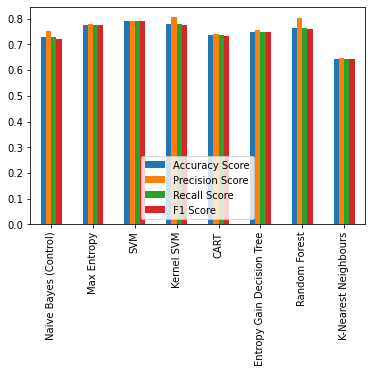

In [18]:
#shows the best across all values
df.plot(kind = 'bar')

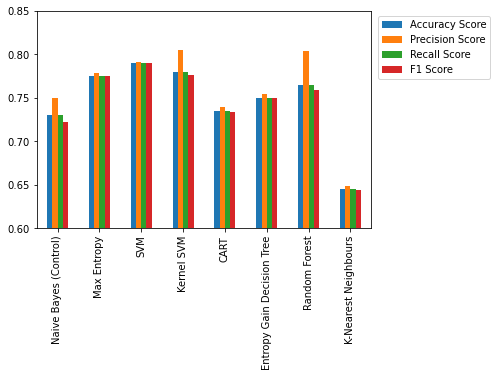

In [29]:
#if you'd prefer a closer view
df.plot(kind = 'bar', ylim = (0.6,0.85))
plt.legend(bbox_to_anchor=(1.37,1));